In [5]:
import mallows_kendall as mk
import numpy as np
import itertools as it
import scipy as sp
import pandas as pd
import random
import matplotlib.pyplot as plt
import permutil as pu
import math
n = 10

In [3]:
math.factorial(10)

3628800

In [9]:
# Compilation
import os
os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -fPIC  -Wall -g -O2  -c rankDepth.cpp -o rankDepth.o')
os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -o rankDepth.so rankDepth.o')
# Restart the kernel after this line

0

In [4]:
# Import and Test 1
from ctypes import *
cdll.LoadLibrary('rankDepth.so')
libc = CDLL('rankDepth.so')
libc.testFunc()

43

In [5]:
# Test 2
val = np.array([5.1])
obj = np.array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1])
n = 10
outp = np.array([1.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
res2 = libc.testFuncCmp(c_void_p(val.ctypes.data),
                       c_void_p(obj.ctypes.data),
                       c_int(n),
                       c_void_p(outp.ctypes.data))
print(res2)
print(outp)

0
[  1.1   0.    0.    0.    0.    0.    0.    0.    0.  142. ]


In [6]:
(val + obj[9]) * n

array([142.])

In [7]:
# Generate data and prepare structures
np.random.seed(1)
n = 5
m = 1000
cons1 = np.random.permutation(n)
print(cons1)
empDist1 = np.array(mk.sampling_mm(m = m, n = n, theta = 5.5, phi = None, s0 = cons1), dtype = c_int)

nMaxDepths = np.array((mk.max_dist(n) + 1) * empDist1.shape[0], dtype = c_int)
# print(empDist1)
print(nMaxDepths)
maxDepths = np.array(range(nMaxDepths), dtype = c_double)
#print(maxDepths)
maxCards = np.array(range(nMaxDepths), dtype = c_int)
#print(maxCards)

[2 1 4 0 3]
11000


In [8]:
res3 = libc.depthCardsKendallTau(c_void_p(empDist1.ctypes.data),
                                 c_int(n),
                                 c_int(m),
                                 c_void_p(nMaxDepths.ctypes.data),
                                 c_void_p(maxDepths.ctypes.data),
                                 c_void_p(maxCards.ctypes.data))

In [9]:
print(nMaxDepths)
print(maxDepths[1000:1010])
print(maxCards[1000:1010])

11000
[1000. 1001. 1002. 1003. 1004. 1005. 1006. 1007. 1008. 1009.]
[0 0 0 0 0 0 0 0 3 0]


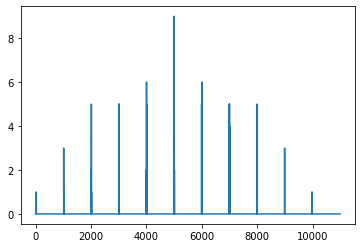

120

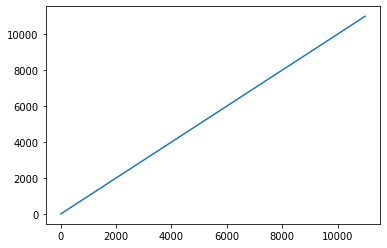

In [10]:
import seaborn as sns
plt.plot(maxCards)#, plt.plot(maxDepths)
plt.show()
plt.plot(maxDepths)
maxCards.sum()
# sns.heatmap(maxCards.reshape(m,11))

In [11]:
# Postprocess the output
depths =  (mk.max_dist(n) - maxDepths / m) / mk.max_dist(n)
depths = depths[maxCards > 0.5]
print(depths)
cards = maxCards[maxCards > 0.5]
print(cards)

[0.9982 0.8992 0.8988 0.8002 0.7998 0.7992 0.7988 0.7002 0.6998 0.6992
 0.6988 0.6008 0.6002 0.5998 0.5992 0.5988 0.5008 0.5002 0.4998 0.4992
 0.4012 0.4008 0.4002 0.3998 0.3992 0.3012 0.3008 0.3002 0.2998 0.2012
 0.2008 0.2002 0.1998 0.1012 0.1008 0.0018]
[1 3 1 1 2 5 1 4 5 5 1 2 6 6 5 1 2 9 9 2 1 5 6 6 2 1 5 5 4 1 5 2 1 1 3 1]


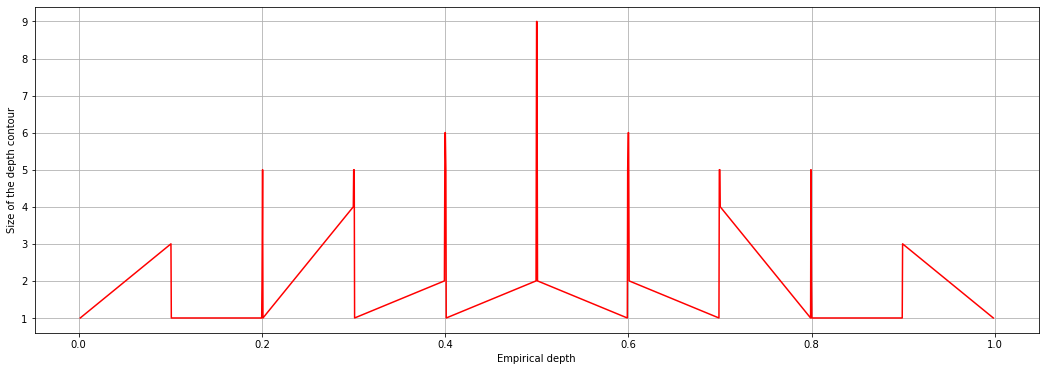

In [12]:
import matplotlib.pyplot as plt
# Plot the graphic
plt.close("all")
plt.figure(1, figsize=(18, 6))
plt.plot(depths, cards, 'r-')
plt.xlabel("Empirical depth")
plt.ylabel("Size of the depth contour")
plt.grid()
plt.show()

# Lower complexity Depth
Complexity 
- previuos complexity 
    - for each permu: $O(m n \log n)$. (indeed it is $O(m n^2)$ but the implementation of the kendall will be updated
- current complexity: 
    - preprocessing of $O(m n \log n)$
    - for each permu: $O(n^2)$

In [14]:
def sample_to_marg_rel(sample):
  m,n = sample.shape
  P = np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      P[i,j] = (sample[:,i]<sample[:,j]).mean()
      P[j,i] = 1 - P[i,j]
#   print("triangles",np.tril(P).sum(),np.tril(P).sum())
  return P

def depth(perm,P):
  return dist_to_sample(perm,P,dist='k')
def dist_to_sample(perm,P,dist='k'):
  if dist=='k':
    return np.tril(P[np.ix_(np.argsort(perm),np.argsort(perm))]).sum()


### how to run it?

In [23]:
n = 6
m = 100
sigma0 = np.random.permutation(n)
# this is how you compute the phi (scale parameter) so that the expected distance is defined by you 
exp_dist = mk.max_dist(n)/5 
phi = mk.find_phi(n,exp_dist,exp_dist+1)
sample = np.array(mk.sampling_mm(m,n,phi=phi,s0=sigma0))
P = sample_to_marg_rel(sample) # there is a preprocessing
# dist_to_sample_slow(perm,sample,dist='k')
perm = np.random.permutation(n)
depth(perm,P)

7.04

## Is the empirical depth of a small sample a good estimator of the probability?
When the sample size $N=1,2,20,1000$, we compare $p(\sigma)$ with $\hat D(\sigma)$ for PL, GMM and MM

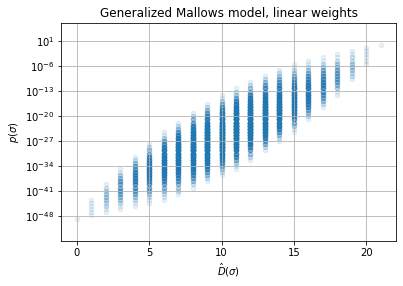

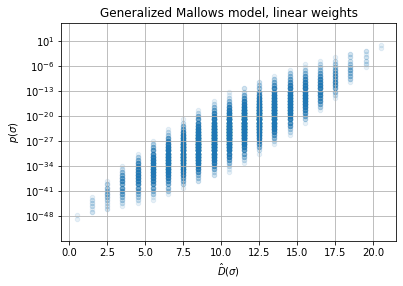

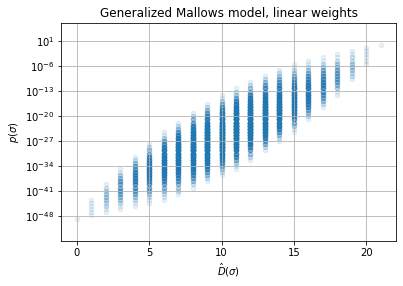

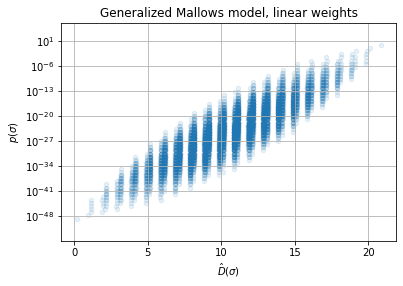

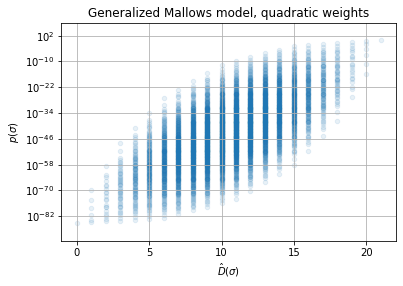

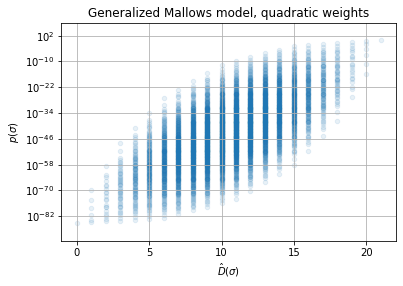

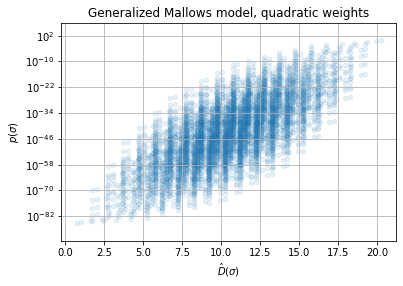

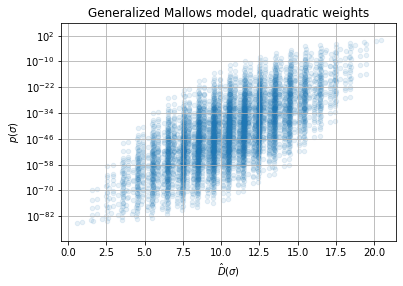

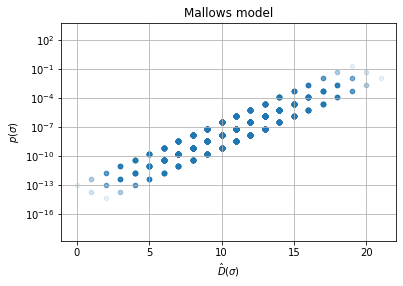

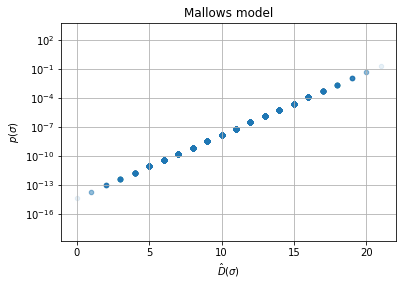

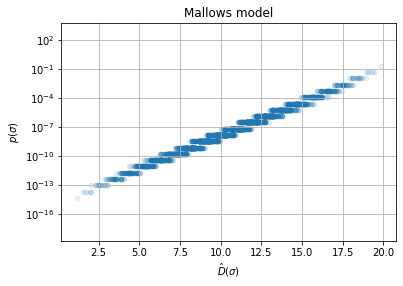

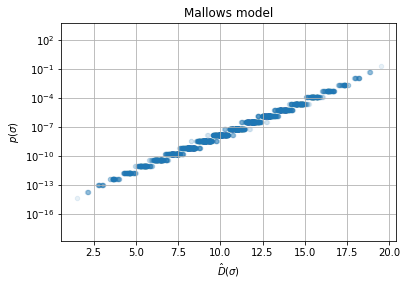

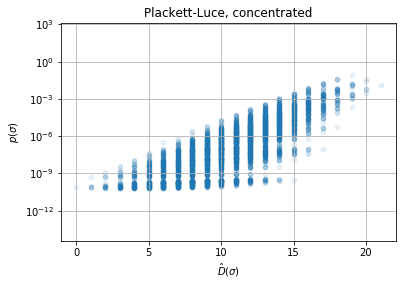

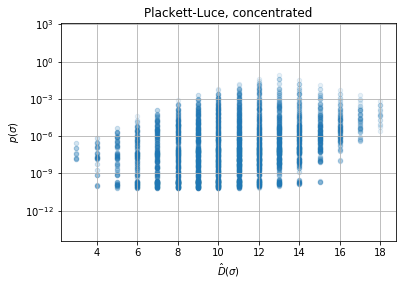

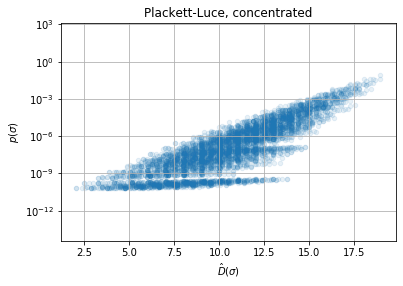

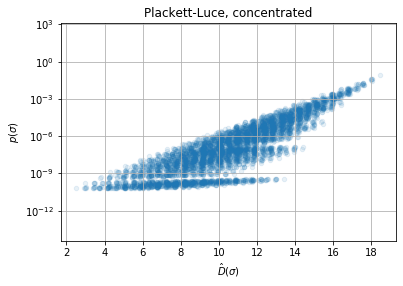

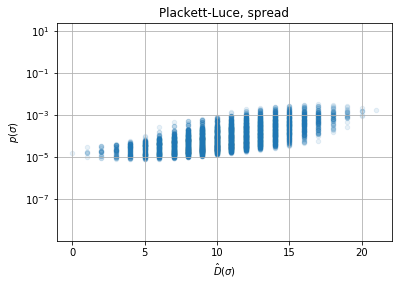

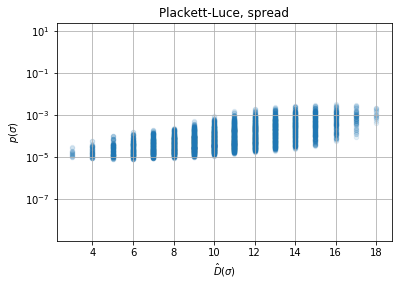

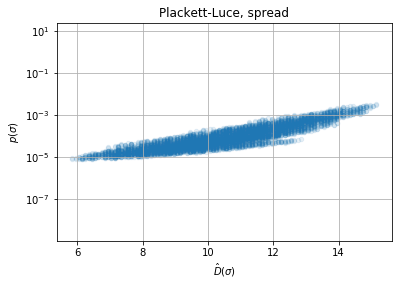

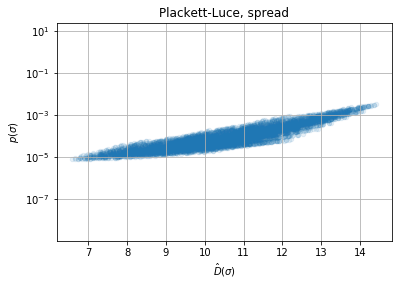

In [7]:
def sample_model(model, n, m, mparams):
  if model == 'GMM': return np.array(mk.sampling_gmm(m,mparams,s0=None))
  if model == 'PL': return pu.plackett_luce(m,n,w=mparams)
def proba_model(model,mparams, perm):
  if model == 'GMM':
    v = mk.ranking_to_v(perm)
    return  np.exp(np.sum(-mparams*v[:-1]))# the alst v is always 0
  if model == 'PL': return  pu.pl_proba(perm,mparams)
def select_model(mid):
  # GMM has a n-1 length param vector
  model, mparams, mtext = None, None, None
  if mid==0:  model, mparams, mtext = 'GMM', np.arange(1,n)*2, 'Generalized Mallows model, linear weights'
  if mid==1:  model, mparams, mtext = 'GMM', np.arange(1,n)**2 , 'Generalized Mallows model, quadratic weights'
  if mid==2: model, mparams, mtext = 'GMM', np.ones(n-1)*1.5 , 'Mallows model'
  if mid==3:  model, mparams, mtext = 'PL',  np.exp(np.arange(n)), 'Plackett-Luce, concentrated'
  if mid==4:  model, mparams, mtext = 'PL',  np.arange(n)+1, 'Plackett-Luce, spread'
  return model, mparams, mtext

m = 20
n = 7
mid = 4
for mid in range(5):
  for m in [1,2,20,1000]:
    model, mparams, mtext = select_model(mid)
    sample = sample_model(model, n, m, mparams)
    P = pu.sample_to_marg_rel(sample) # there is a preprocessing
    res = []
    for perm in it.permutations(range(n)):
      emp_depth = n*(n-1)/2 - pu.dist_to_sample(perm,P,dist='k')
      proba = proba_model(model,mparams, perm)
      res.append([emp_depth,proba])
    df = pd.DataFrame(res,columns=['emp_depth','proba'])
    df['proba'] = df['proba']/df['proba'].sum()
    df.plot.scatter(x='emp_depth',y='proba',logy=True, alpha=0.1)
    plt.grid()
    plt.xlabel(r'$\hat D(\sigma)$')
    plt.ylabel(r'$p(\sigma)$')
    plt.title(mtext)
    plt.savefig('img/'+mtext.replace(' ','_').replace(',','_')+'_m'+str(m)+'.pdf')

